# CS51 Assignment 2: Algorithms and Simulation


This assignment has two distinct parts in addition to a reflection: Part 1 requires you to apply your knowledge of algorithmic thinking and optimization and Part 2 allows you to demonstrate your modeling and coding skills by writing a numerical simulation. Material relevant for Part 1 will be covered in class during weeks 3-5, while material relevant for Part 2 will be covered in class during weeks 7 and 8. 


You'll notice several "*Optional Challenge*" problems throughout the assignment to challenge yourself. These will only be scored (4 or 5) if they are completed correctly with thorough explanation. If you attempt an optional challenge but do not succeed, you will not be penalized with a low score. Remember that you must include an explanation and interpretation for optional problems to be scored.


*This is an individual assignment. We will be checking for similarities among submissions and will take plagiarism seriously*.


**You must complete all tasks within this pre-formatted Jupyter notebook. Please follow ALL formatting guidelines and the HC Guidelines in the assignment instructions on Forum (near the top and bottom of the instructions respectively).**

## **PART 1: OPTIMIZATION**

For this section of the assignment, you will select one of the scenarios below and apply #optimization. You must complete all sections. [#optimization, potentially relevant: #modeling, #algorithms, #variables, #utility, #constraints]

1. *Scenario 1*: To prevent the spread of an infectious disease, a vaccine needs to be distributed as quickly and efficiently as possible to the 15 cities that have had major outbreaks. How can you optimize the route between the cities? For this scenario, you should select cities that are relevant to the disease that you will choose for PART 2 and include a map of these cities (you may use an existing map or draw your own). 


2. *Scenario 2*: Suppose that a new virus is starting to spread, and many clinics do not have sophisticated diagnostic tools and must be able to determine whether or not a patient has this dangerous virus based solely on easily measured symptoms. You have been collecting information on symptoms (temperature, WBC count, headache severity, and cough severity) and you need to determine which patients have this new disease and which have only a milder illness. Plots that provide an overview of the data are available [here](https://drive.google.com/file/d/1td_jCTzYiOCMPJ8CwVSJU7u-pQ-5R1JW/view?usp=sharing). The data can be accessed at [this link](https://drive.google.com/file/d/1smz8OhVkIAbWVKpmkx7liE3bOWLfQch7/view?usp=sharing) (1 = Infected, 0 = Not infected).

#### 1.1 Optimization Problem: 
Describe the optimization problem for your scenario: what is the objective function? What are the decision variables? Are there any constraints? Clearly articulate each component so that it’s clear how the objective function would be measured and how the decision variables would impact it (~200 words). 


The objective function in our condition is maximizing the fraction of people that are correctly diagnosed with the new disease. The decision variables in this case would be the four quantities that we have been measuring i.e. temperature, WBC count, headache severity, and cough severity. All four of these are quantitatively continuous in principle i.e. they can assume any value in an interval but when we measure them in practice, they become quantitatively discrete due to the limit in accuracy of the instruments used. However, we do not have a description of how these variables have been measured and thus, can not be sure about the techniques and exact nature of the variables which is also one of the constraints we have. Moreover, another constraint that we might be facing is the time because we are dealing with human lives here and hence are working under a time constraint to diagnose as quickly as possible with as little errors as possible. Finally, another constraint would be that if the headache and cough severity are based on patient feedback, people have different pain tolerances and cough is widely dependent on the immune response of the people. Thus, these two variables need to have a well-defined universal scale and units of measurement if they are to be used in any calculations or else the results could be inaccurate. The results from these calculations would yield the decision of whether the person is infected with the new disease or is it another milder illness. This is itself a binary variable with values of 0 & 1 (1 = infected, 0 = Not infected). This can be measured against known results to determine the fraction of people predicted correctly and then can be further implemented after adjustments if needed.

#### 1.2 Optimization Technique: 

What process can be used to find the optimal solution in your scenario? Identify and describe an existing algorithm that could be used to complete this process, including the inputs, outputs, and required steps. Explain the advantages and limitations of this algorithm. In your explanation, you should address whether your algorithm would lead to the global optimum and you may wish to compare your algorithm with other possible optimization techniques. (~200 words)

- *Optional*: Draw a flowchart to illustrate the process. 

- *Optional*: Create a program in python to implement this optimization process.


Using a decision tree would be ideal for the optimization in this scenario. Using the different attributes that we have already been measuring allows us to have multiple leaves and having every measurement for each sample patient also means that we have a large number when it comes to samples per leaf. Using all these decision variables allows us to split the data effectively and in the most homogenous manner possible. We first split the data randomly into sets of 30% as testing data and 70% as testing data. This gives us initial outputs of 0 & 1(see above) which become the secondary inputs/decision variables. The training dataset inserted into the algorithm generates the decision tree parameters and then the testing data is used to evaluate the effectiveness of these. Calculating the accuracy of both of these against the already known values gives us the accuracy of the algorithm which is the final output and the quantity we want to maximize. Having multiple variables also exposes us to potential overfitting and render the algorithm useless but random forest methods can help to solve that. We would still not have the global maximum but that is expected because of the various constraints like the differences in immune responses but it is more effective as it is simple to visualize and implement while also being much less prone to outlier affecting it. Moreover, it is supervised Machine Learning and yields relatively higher accuracies in quicker time with the amount of data that we have which makes it much more effective to use in medical problems where we need instant results to prevent a potential breakout of the disease and limit its spread. A testing accuracy of above 0.85 should be enough to pass the test.

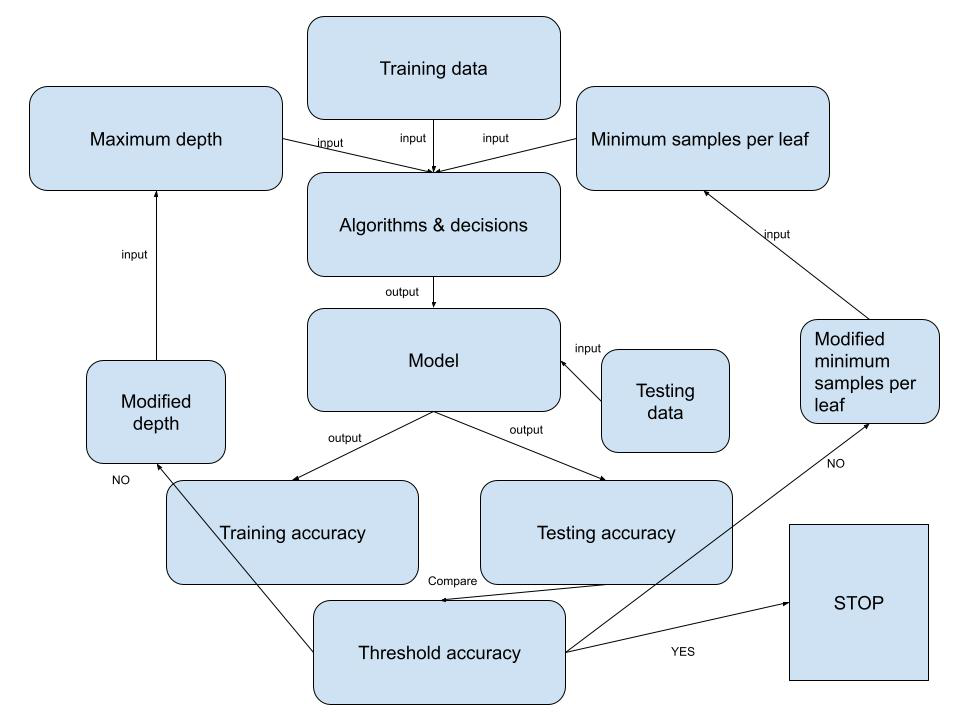

,Infected,Temperature,WBC Count,Headache Severity,Cough Severity
0,0,38.36,12170.76,4.99,5.39
1,0,35.99,11684.54,3.05,2.95
2,0,35.71,8256.36,2.83,2.63
3,0,35.91,5322.54,3.98,1.48
4,0,34.81,7979.27,5.16,3.92
...,...,...,...,...,...
95,1,37.29,12630.87,4.30,7.17
96,1,38.96,10229.35,4.53,7.76
97,1,37.78,9714.87,5.15,7.19
98,1,37.83,8912.79,9.08,6.20


In [18]:
# add cells as needed for the optional problems
import pandas as pd #pandas is a very helpful package for data analysis that uses a DataFrame structure
pd.set_option('max_rows', 10) #this keeps pandas from displaying ALL the data
import matplotlib.pyplot as plt #importing matplotlib package
%matplotlib inline 
#tells matplotlib to display figures in the notebook and not in a separate window
from PIL import Image # Importing the image object from the Pillow library
from IPython.display import display #displays the loaded image within the notebook
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

img = Image.open('CS51 Algorithms.jpg')# Opening the flowchart image using the Image object
display(img) #display the image "img"


#import data from simplified .csv file
filename = 'CS51_Assignment_Diagnosis_Data.csv'
#imports data as filename from the CS51_Assignment_Diagnosis_Data.csv datafile 
data = pd.read_csv(filename) 
#asks panda to read those data from the newly defined filename into a  panda dataframe known as 'data'
data

In [17]:
all_inputs = data[['Temperature', 'WBC Count', 'Headache Severity', 'Cough Severity']].values
# references all the attributes to be used in making decisions within the decision tree
all_classes = data[ 'Infected'].values 
#references the attribute to be effectively classified in the decision tree
(train_inputs, test_inputs, train_classes, test_classes) = train_test_split(all_inputs, all_classes, train_size=0.7, test_size=0.3,random_state=1)
#splits 70% of the data to be used to train the decision tree model while 30% is used to test it



depth = 20 #represents the maximum depth of the decision tree
min_samples = 3 #represents the minimum samples per leaf in the decision tree
dtc = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=min_samples) #generates a classifier based on these conditions
dtc.fit(train_inputs, train_classes) #models the tree using the training data
print("Training Accuracy score:",dtc.score(train_inputs, train_classes))
#tests the generated tree against the training data to obtain a training accuracy
print("Test Accuracy score:",dtc.score(test_inputs, test_classes))
#tests the generated tree against the testing data to obtain a testing accuracy

Training Accuracy score: 0.9571428571428572
Test Accuracy score: 0.8666666666666667


## **PART 2: SIMULATION**

The SIR model of the spread of disease is commonly used to help understand how a disease might move through a population. You were introduced to this with the NetLogo agent-based model in NS50 and will review it again in Week 7 of CS51. Check out the class readings to learn about this model.


For this assignment, you will select one disease of your choice to model. Please choose a disease from [THIS LIST](https://docs.google.com/spreadsheets/d/1_p_6W8Zh07XFwuQ3EzkT7PEdbtwTzejHbpKm_wBOLas/edit?usp=sharing) to investigate.  If you would like to select your own disease to model, you may email your professor with the disease and parameter descriptions for approval. You must select an infectious disease (one that is transmitted from person to person through a viral, bacterial, or parasitic agent), not a genetic or environmental disease. 

### **Part 2.1 Numerical Modeling and Simulation**

For this part of the assignment, you’ll consider the SIR model described by the set of differential equations below, and the numerical simulation in Python via Euler’s method.

$$ \frac{dS}{dt} = -\frac{b}{N}S(t) I(t) $$
<br>
$$ \frac{dI}{dt} = \frac{b}{N}S(t)I(t) - kI(t) $$
<br>
$$ \frac{dR}{dt} = k I(t) $$
<br>

#### 2.1.1 Variables and Parameters (~250 words) [#variables] 

This section serves to set up an initial analysis of the SIR model. 
1. State the disease you selected to model.
2. Identify the relevant **variables** of the model, classify what type of variables they are, and explain what they mean in the context of your model. 
3. Explain what the relevant **parameters** ($b$ and $k$) are and how to select appropriate values for them, including the initial values. You’re encouraged to use empirical data if possible to justify these values. You may also complete a well-reasoned #estimation for any values that are difficult to justify with empirical data. Include APA citations for any external sources used. Note that you can work with population values $S$, $I$, $R$, or proportions, $S/N$, $I/N$, $R/N$, as long as you are consistent.
4. Explain what it would mean for the parameters ($b$ and $k$) to be smaller or larger. Consider what real-world factors would reduce or increase these parameters.
5. *Optional*: Modify the basic SIR model to add a layer of real-world complexity. A few ideas are listed below. Explain the key features of the extended model, including the modified differential equations and a full description and classification of any new variables and parameters following the steps above.
  - Vaccination
  - Antibiotic use and/or development of antibiotic resistance
  - Variability in population susceptibility (e.g. children and the elderly have different rates of infection compared to young adults).
  - Birth and death rates in the population

Ebola Virus: Time is a quantitative discrete variable in this case because we have a defined smallest unit of measurement(days) and thus it can not assume any values other than the positive integers thus time, t >= 0. Time is very important in this case because the incubation period, infective period and the various rates all depend on time and help to define the parameters, b and k. In the case of the SIR model, b and k are modified parameters and they affect the rate of change of S, I, and R values. S, I, and R values are quantitative continuous values in principle but in practice when they are implemented in algorithms, they become discrete because of the limitations of memory and computational power as well as we have to suit it to the language being used(in this case, Python). On the specific instance of June 24, 2014: S = 7017000; I = 158; R = 0; b(infection rate) = 0.8 per person per day; k(recovery rate) = 0.5 per person per day. Such a high b value means the infection rate is high and the recovery rate is the probability of a person recovering per day. Since the recovery rate is lower than the infection rate, it can be expected that the total number of active cases will continue to grow as more people get affected. Also, higher recovery rates would mean that the people are getting recovered quickly and could imply that people are getting healthcare which is effective while higher infection rate means that people might not be following policies for prevention and exchange of fluids is still taking place.
Optional: Since ebola can still infect people from dead bodies and also people who have recovered can be infected again, we can not add the number of dead to the removed part of the model. Also, recovered males can still infect others with their semen 7 weeks after the recovery. Thus, there is a lot of complex monitoring that will have to go into the model and people can not simply be classified as removed even if they have recovered or died. The only way to effectively remove a person from the whole model into the removed category would be to vaccinate them as that is the only method by which they can not be infected again. Thus, we need to modify the model that exists before the vaccine to account for people who are receiving the effective treatment only. There has to be a very narrow range of antibiotics or antivirals that will be effective and can be counted as part of this effective treatment. Supposing effective treatment access to be ‘a’, we will have to modify the equation accordingly. This can not be modelled into one of the parameters as it affects both the b and k values so it is better to have it as a separate parameter, ‘a’. Moreover, this parameter would increase the recovery rate because of their added effectiveness so the equations become:
ds/dt = -((b - a)/N)(S(t))(I(t))
dI/dt = ((b - a)/N)(S(t))(I(t)) - (k + a)(I(t))
dR/dt = (k + a)(I(t))

#### 2.1.2 Euler’s Method Description (~150 words) [#algorithms]

Explain what it means to solve the SIR differential equations and how Euler’s method works as an algorithm to achieve a numerical solution via simulation. In your explanation, identify whether the model and simulation are continuous or discrete, and consider the role of the step size (`h`) in the algorithm.

Solving the SIR equations by Euler’s method yields the analytical solution in numeric form. It is as close as possible to the real solution using the initial positions and the rates of change in the infection rate and recovery rate. It estimates the solution based upon the expected rate of change in the gradient from the initial position, the process taking several steps/iterations whose number depends on the step size(h). The lower the step size, lesser the divergence from the real solution and the more number of iterations. The higher number of iterations also call for more computational power. As the step size is a discrete quantity controlled by us, the solution in practice will be discrete although in principle the solution of the SIR model is continuous.

#### 2.1.3 Euler’s Method Implementation [#algorithms, #dataviz]

Implement a numerical simulation to derive the implications of your model using Euler’s method in Python.Your simulation must generate at least one relevant visualization of the disease dynamics, including a descriptive figure legend and caption. You may need to adjust the run-time and step size in your simulation to ensure the visualization is maximally informative. Include thorough comments in your code to convey your understanding of the implementation of Euler’s method. 

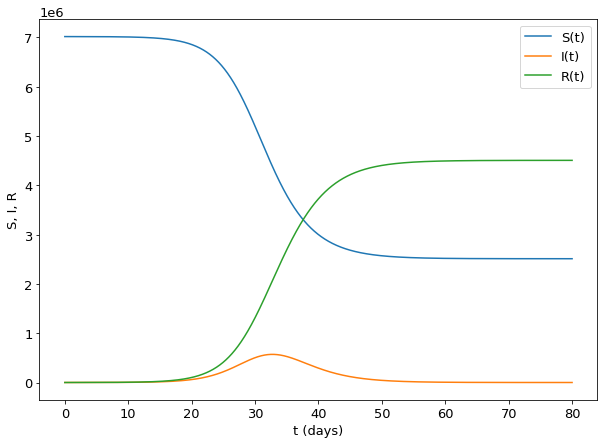

Line graph showing the visualizations of the dynamics within the S, I, and R populations as a function of time. By modifying the infection and recovery rates of the virus, simulations of the population groups can be visualized and then analyzed. As the population size is significantly large, the vertical axes is represented in powers of 6.


In [7]:
# Add your Numerical Simulation here!
#code adapted from Session 13: 7.2
import numpy as np

t0 = 0 # This corresponds to the initial start time. In this case June 24, 2014
t_end = 80 # The visualization starts to become constant after 60 days so a time period of 80 should be enough

h = 0.01 #step size
steps = int((t_end - t0)/h + 1) # number of steps/iterations

# variables:
t = np.linspace(t0, t_end, steps) # storing t values
S = np.zeros(steps) # for storing S values
I = np.zeros(steps) # for storing I values
R = np.zeros(steps)

#the infection rate and recovery rate parameters:
b = 0.8 #infection rate
k = 0.5 #recovery rate

def dSdt(t,S,I):
    # dS/dt
    return  -1 * b/N * S * I #outputs the differential equation dS/dt
def dIdt(t,S,I):
    # dI/dt
    return b/N * S * I - k * I #outputs the differential equation dI/dt

def dRdt(t,I):
    #dR/dt
    return k * I #outputs the differential equation dR/dt

# initial conditions:
S[0] = 7017000#the initial susceptible population
I[0] = 158#the initial infected population
R[0] = 0 #the initial removed population
N = S[0] + I[0] + R[0] #the total population

for n in range(steps-1): # range(start, stop, step)
    S[n+1] = S[n] + h * dSdt(t[n], S[n], I[n])# outputs the next S-value as a function of Euler's method on the dSdt, h, and the prior S[n]
    I[n+1] = I[n] + h * dIdt(t[n], S[n], I[n])# outputs the next I-value as a function of Euler's method on the dIdt, h, and the prior I[n]
    R[n+1] = R[n] + h * dRdt(t[n], I[n]) # outputs the next R-value as a function of Euler's method on the dRdt, h, and the prior R[n]

import matplotlib.pyplot as plt #imports the matplotlib library
plt.rcParams.update({'font.size': 13}) #sets the parameters for the font size
plt.rcParams["figure.figsize"] = [10, 7] #sets the parameters for the figure's height and width
plt.plot(t,S,linewidth= 1.5, label='S(t)') #sets the legend, linewidth parameters, and data to be plotted
plt.plot(t,I,linewidth= 1.5, label='I(t)') #sets the legend, linewidth parameters, and data to be plotted
plt.plot(t,R,linewidth= 1.5, label='R(t)') #sets the legend, linewidth parameters, and data to be plotted
plt.xlabel('t (days)') #sets the label for the x-axis
plt.ylabel('S, I, R') #sets the label for the y-axis
plt.legend(loc='best') #sets the location for the legend. 
plt.show() #shows the plotted figure
print("Line graph showing the visualizations of the dynamics within the S, I, and R populations as a function of time. By modifying the infection and recovery rates of the virus, simulations of the population groups can be visualized and then analyzed. As the population size is significantly large, the vertical axes is represented in powers of 6.")

#### 2.1.4 Results and Interpretation (~250 words) [#modeling, #dataviz]

- Interpret the results of the numerical simulation by making reference the output in the visualization(s). To fully interpret the results, you should run the simulation multiple times with varying parameter inputs (b and k) and observe the behavior of your model. Does the behavior align with what you would expect these adjustments to have in reality (given your answer to 1.4 above)?  

- Explain how useful this model is by considering the following guiding questions: What insights can be gained? How closely do the results match what you’d expect in reality? What are the most notable assumptions of this model and what impact do they have on its usefulness?


When we increase the b-values, the infected number starts to grow faster but the change is very small because of the high susceptible population and the low number of infected people. The rate is still observable and that is to be expected and the reason it differs so much from the real conditions is due to the lack of observations and supervision. Increasing the k-value means that people change from the infected part to the removed part much quicker and thus the model tends to flatten out even quicker than 40 days. Changes to these values can help predict how a model will react in the case of this change occurring in real life. However, due to the unpredictability of the virus, multiple constraints(see above), and the lack of communication, the model does not match the actual observed trend for even a week and is very rare on a day. If we change the values to be as realistic as possible and also find a way that the model changes them as it goes along, we can further improve the model. Moreover, by feeding live data into the model that trains it so that it trains itself accordingly can help us find better predictions more close to what is observed in real life.

### **Part 2.2 Agent-Based Modeling and Simulation**

For this part of the assignment, you’ll consider an agent-based model to describe the spread of disease and an agent-based simulation implemented in [NetLogo](http://ccl.northwestern.edu/netlogo/models/Virus). Explore the model thoroughly and run it multiple times with different parameter settings.

Note about parameters: this model uses similar variables and parameters as the one above, but the parameters are not defined identically. In particular, the "Infectiousness" parameter in NetLogo is analogous to, but not equivalent to the infection rate in the SIR model. Thus, they should not be set to the same value in both of your simulations. The infection rate in the SIR model already incorporates the interaction rate of individuals, while the NetLogo simulation sets that rate separately. In other words, the "infectiousness" parameter in NetLogo only dictates the probability of infecting someone if they come close enough, but does not take into account how frequent those interactions occur. Be sure to investigate the meaning of the other parameters as well so that you understand how to set them appropriately.
<br>

#### 2.2.1 Simulation Comparison (~250 words) [#modeling]

After fully exploring the model and running multiple simulations, summarize how it compares to your simulation above. Address the following points:

- Identify the main similarities between the Python SIR simulation and the NetLogo simulation.

- Identify the major differences between the Python SIR simulation and the NetLogo simulation.

- Identify one advantage of the Python SIR simulation over the NetLogo simulation. 

- Identify one advantage of the NetLogo simulation over the Python SIR simulation.

- Based on the results of the simulations, which one do you believe is a more realistic representation of nature? Justify your reasoning.



The Python model is a deterministic discrete model that models the three population states of Susceptible, Infectious, and Removed and how they change. The NetLogo model is an agent-based stochastic model that simulates individuals with their own set of rules looking for emergent properties with the transitions between the same states as above. Both the simulations use discrete time-intervals to model the dynamics. However, the Python simulation is an aggregate simulation which looks at the population as a whole while the NetLogo model brings in the element of randomness as all the agents are independent of one another. It also brings in different angles by which close contact can occur which is a characteristic of Ebola. The Python model is useful for observing general trends in the population based on parameters while the NetLogo model gives us more individualistic trends. While the Python model gives us better visualizations of emergent properties, the element of randomness in the NetLogo simulation is a much more accurate representation of human nature giving the model a more natural look with much more accurate predictions.

#### 2.2.2 *Optional*: Your own agent-based simulation [#algorithms, #modeling]:

Create your own agent-based simulation of the disease dynamics for your chosen disease in Python. You may add in real-world complexities as desired (vaccination, antibiotic use and/or development of antibiotic resistance, variability in population susceptibility). Your work needs to be explained in sufficient detail, including citations to any external sources consulted, in order to receive credit.

- One option: a tree graph can be useful in modeling person-to-person interactions. 

- Another option: turtles. 


In [ ]:
# Add code to complete the optional implementation 
# Add more cells as needed

## **REFLECTION**

In less than 100 words, explain how this unit has enhanced your view of the power of modeling, algorithms, and simulations to describe the natural world around you. 

This unit in particular enhanced my knowledge of how algorithms and models can be integrated and how the use of data in predictions can be misleading due to the lack of certain data or missing out on certain variables that may play a much bigger impact in the prediction than is visible to the naked eye. I also understood how various algorithms can be applied to daily life and the pros and cons of each. My understanding of how certain algorithms that seem very simple to be applied might not be the most effective ones in the situation and thus can be optimized with little effort. Finally, I learned that human nature is very unpredictable and using models that run without randomness is more often than not very ineffective.

In [ ]:
References

Disease Control & Prevention, C. (2020, February 19). Case counts error processing SSI file. Retrieved March 08, 2021, from https://www.cdc.gov/vhf/ebola/history/2014-2016-outbreak/case-counts.html


## You're done! 

You must upload TWO files:


1. A **PDF** of your entire assignment. This is to be submitted as a separate file, NOT simply inside the zipped folder. Email attachments will not be accepted. We encourage students to follow the tips available in [this guide](https://docs.google.com/document/d/1gRMol9Ebbvyu1mvEKzma92o_N7ZbNXsPIb1QdQV0TeE/edit?usp=sharing), especially the best practices listed at the end.


2. A **zipped folder** containing the .ipynb file and any other relevant files for running the notebook.